# Seleção de recursos com o pacote Caret R

A importância dos recursos pode ser estimada a partir de dados construindo um modelo. Alguns métodos, como árvores de decisão, têm um mecanismo construído para relatar uma importância variável. Para outros algoritmos, a importância pode ser estimada usando uma análise da curva ROC realizada para cada atributo.

O exemplo abaixo carrega o conjunto de dados de Diabetes dos índios Pima e constrói um modelo de Quantização de Vector de Aprendizagem (LVQ). O varImp é usado para estimar a importância da variável, que é impressa e plotada. Isso mostra que os atributos de glicose, massa e idade são os 3 principais atributos mais importantes no conjunto de dados e o atributo de insulina é o menos importante.

In [1]:
set.seed(7)
library(mlbench)
library(caret)

Warning message:
“package ‘caret’ was built under R version 3.4.3”Loading required package: lattice
Loading required package: ggplot2


## Load Data Set

In [2]:
dados.vendas <- read.csv("data/food-sp.csv", header=TRUE)
dados.vendas = as.data.frame(dados.vendas)
dados.vendas[is.na(dados.vendas)] <- 0
dados.vendas = dados.vendas[, c('VENDA', 
                                'LANCHE.FRANQUEADO', 
                                'CHOPP.COM.UNIDADE.EM.LITRO', 
                                'ACOMPANHAMENTO', 
                                'SACHET.MOLHO.PINCANHA', 
                                'SANDUICHE', 
                                'BEX.CAFE', 
                                'PROJETO.CAFÉ', 
                                'BEX.SANDUICHES.E.MOLHOS', 
                                'BEX.DOCES', 
                                'MOLHO.FESTIVAL', 
                                'PRATO', 
                                'CALDA.BOBS.TOP', 
                                'DOCE.E.TORTA', 
                                'BEX.SNACKS', 
                                'LINHA.ORIGINAL', 
                                'BEX.BEBIDAS', 
                                'MOLHO', 
                                'REFEICAO.COLABORADORES', 
                                'GELADO.E.MILK.SHAKE', 
                                'BRINDE', 
                                'ADICIONAL', 
                                'BEX.GELADOS.E.MILKSHAKES', 
                                'BEX.SALADAS', 
                                'PROJETO.CHOPP', 
                                'BEBIDA', 
                                'BEBIDA.COM.UNIDADE.EM.LITRO', 
                                'ITENS.DE.COMPOSIÇÃO', 
                                'OUTROS'
                               )]

In [3]:
dados.vendas <- read.csv("data/food-sp.csv", header=TRUE)
dados.vendas = as.data.frame(dados.vendas)
dados.vendas[is.na(dados.vendas)] <- 0
dados.vendas = dados.vendas[, c('VENDA', 
                                'LANCHE.FRANQUEADO', 
                                'ACOMPANHAMENTO', 
                                'SACHET.MOLHO.PINCANHA', 
                                'SANDUICHE', 
                                'PROJETO.CAFÉ',  
                                'MOLHO.FESTIVAL', 
                                'PRATO', 
                                'CALDA.BOBS.TOP', 
                                'DOCE.E.TORTA', 
                                'LINHA.ORIGINAL', 
                                'MOLHO', 
                                'REFEICAO.COLABORADORES', 
                                'GELADO.E.MILK.SHAKE', 
                                'BRINDE', 
                                'ADICIONAL', 
                                'PROJETO.CHOPP', 
                                'BEBIDA', 
                                'ITENS.DE.COMPOSIÇÃO', 
                                'OUTROS'
                               )]

colnames(dados.vendas)[colnames(dados.vendas) == 'VENDA'] <- 'Venda'
colnames(dados.vendas)[colnames(dados.vendas) == 'LANCHE.FRANQUEADO'] <- 'Lanche.Franqueado'
colnames(dados.vendas)[colnames(dados.vendas) == 'ACOMPANHAMENTO'] <- 'Acompanhamento'
colnames(dados.vendas)[colnames(dados.vendas) == 'SACHET.MOLHO.PINCANHA'] <- 'Sachet.Molho.Picanha'
colnames(dados.vendas)[colnames(dados.vendas) == 'SANDUICHE'] <- 'Sanduíche'
colnames(dados.vendas)[colnames(dados.vendas) == 'PROJETO.CAFÉ'] <- 'Café'
colnames(dados.vendas)[colnames(dados.vendas) == 'MOLHO.FESTIVAL'] <- 'Molho.Festival'
colnames(dados.vendas)[colnames(dados.vendas) == 'PRATO'] <- 'Prato'
colnames(dados.vendas)[colnames(dados.vendas) == 'CALDA.BOBS.TOP'] <- 'Calda.de.Milkshake'
colnames(dados.vendas)[colnames(dados.vendas) == 'DOCE.E.TORTA'] <- 'Doce.e.Torta'
colnames(dados.vendas)[colnames(dados.vendas) == 'MOLHO'] <- 'Molho'
colnames(dados.vendas)[colnames(dados.vendas) == 'REFEICAO.COLABORADORES'] <- 'Refeição.Colaboradores'
colnames(dados.vendas)[colnames(dados.vendas) == 'GELADO.E.MILK.SHAKE'] <- 'Milkshake'
colnames(dados.vendas)[colnames(dados.vendas) == 'BRINDE'] <- 'Brinde'
colnames(dados.vendas)[colnames(dados.vendas) == 'ADICIONAL'] <- 'Adicional'
colnames(dados.vendas)[colnames(dados.vendas) == 'BEBIDA'] <- 'Bebida'
colnames(dados.vendas)[colnames(dados.vendas) == 'PROJETO.CHOPP'] <- 'Chopp'
colnames(dados.vendas)[colnames(dados.vendas) == 'ITENS.DE.COMPOSIÇÃO'] <- 'Itens.de.Composição'
colnames(dados.vendas)[colnames(dados.vendas) == 'OUTROS'] <- 'Outros'
colnames(dados.vendas)[colnames(dados.vendas) == 'LINHA.ORIGINAL'] <- 'Linha.Original'


In [4]:
f = apply(dados.vendas[,-1], 2, function(x) sum(x))

In [5]:
colSums(dados.vendas)

Venda      Lanche.Franqueado         Acompanhamento 
          1.129720e+09           0.000000e+00           8.599134e+07 
  Sachet.Molho.Picanha              Sanduíche                   Café 
          3.328150e+03           3.241460e+08           4.361322e+06 
        Molho.Festival                  Prato     Calda.de.Milkshake 
          2.161750e+03           4.403061e+06           2.266300e+02 
          Doce.e.Torta         Linha.Original                  Molho 
          5.315263e+05           0.000000e+00           0.000000e+00 
Refeição.Colaboradores              Milkshake                 Brinde 
          1.002198e+04           5.382855e+08           1.660750e+06 
             Adicional                  Chopp                 Bebida 
          1.335450e+07           7.938141e+05           1.548703e+08 
   Itens.de.Composição                 Outros 
          1.179488e+05           0.000000e+00

In [6]:
# prepare training scheme
control <- trainControl(method="repeatedcv", number=20, repeats=3)

# train the model
#lm, rf
#RMSE, Rsquared
model <- train(Venda ~ ., data=dados.vendas, 
               method="lm", 
               metric="RMSE", 
               preProcess="scale", 
               trControl=control, 
               importance = TRUE)

# estimate variable importance
importance <- varImp(model, scale=TRUE)

Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
“These variables have zero variances: Lanche.Franqueado, Linha.Original, Molho, Outros”Warning message:
“In lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) :
 extra argument ‘importance’ will be disregarded”Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
“These variables have zero variances: Lanche.Franqueado, Linha.Original, Molho, Outros”Warning message:
“In lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) :
 extra argument ‘importance’ will be disregarded”Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
“These variables have zero variances: Lanche.Franqueado, Linha.Origina

 extra argument ‘importance’ will be disregarded”Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
“These variables have zero variances: Lanche.Franqueado, Linha.Original, Molho, Outros”Warning message:
“In lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) :
 extra argument ‘importance’ will be disregarded”Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
“These variables have zero variances: Lanche.Franqueado, Linha.Original, Molho, Outros”Warning message:
“In lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) :
 extra argument ‘importance’ will be disregarded”Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”Warning

“These variables have zero variances: Lanche.Franqueado, Linha.Original, Molho, Outros”Warning message:
“In lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) :
 extra argument ‘importance’ will be disregarded”Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
“These variables have zero variances: Lanche.Franqueado, Linha.Original, Molho, Outros”Warning message:
“In lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) :
 extra argument ‘importance’ will be disregarded”Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
“These variables have zero variances: Lanche.Franqueado, Linha.Original, Molho, Outros”Warning message:
“In lm.fit(x, y, offset = offset, singular.ok = singular.o

“prediction from a rank-deficient fit may be misleading”Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
“These variables have zero variances: Lanche.Franqueado, Linha.Original, Molho, Outros”Warning message:
“In lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) :
 extra argument ‘importance’ will be disregarded”Warning message in predict.lm(modelFit, newdata):
“prediction from a rank-deficient fit may be misleading”Warning message in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10, :
“These variables have zero variances: Lanche.Franqueado, Linha.Original, Molho, Outros”Warning message:
“In lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) :
 extra argument ‘importance’ will be disregarded”

In [7]:
print(importance)

lm variable importance

                         Overall
Milkshake              100.00000
Sanduíche               24.53073
Bebida                  11.30471
Acompanhamento           9.15339
Adicional                2.23974
Café                     1.79363
Brinde                   1.73649
Prato                    1.40287
Doce.e.Torta             0.19389
Calda.de.Milkshake       0.13743
Chopp                    0.09624
Refeição.Colaboradores   0.05169
Molho.Festival           0.01723
Itens.de.Composição      0.01159
Sachet.Molho.Picanha     0.00000


In [102]:
labels = c("Acompanhamento",
            "Sachet.Molho.Picanha",
            "Sanduíche",
            "Café",
            "Molho.Festival",
            "Prato",
            "Calda.de.Milkshake",
            "Doce.e.Torta",
            "Refeição.Colaboradores",
            "Milkshake",
            "Brinde",
            "Adicional",
            "Chopp",
            "Bebida",
            "Itens.de.Composição")

In [103]:
values = importance$importance$Overall

In [105]:
df.importantes = data.frame(labels, values)

In [114]:
df.importantes = df.importantes[order(-df.importantes$values),]

In [121]:
df.importantes

,labels,values
10,Milkshake,100.00000000
3,Sanduíche,24.53073299
14,Bebida,11.30471251
1,Acompanhamento,9.15338921
12,Adicional,2.23973698
4,Café,1.79362936
11,Brinde,1.73649004
6,Prato,1.40286765
8,Doce.e.Torta,0.19388594
7,Calda.de.Milkshake,0.13742680


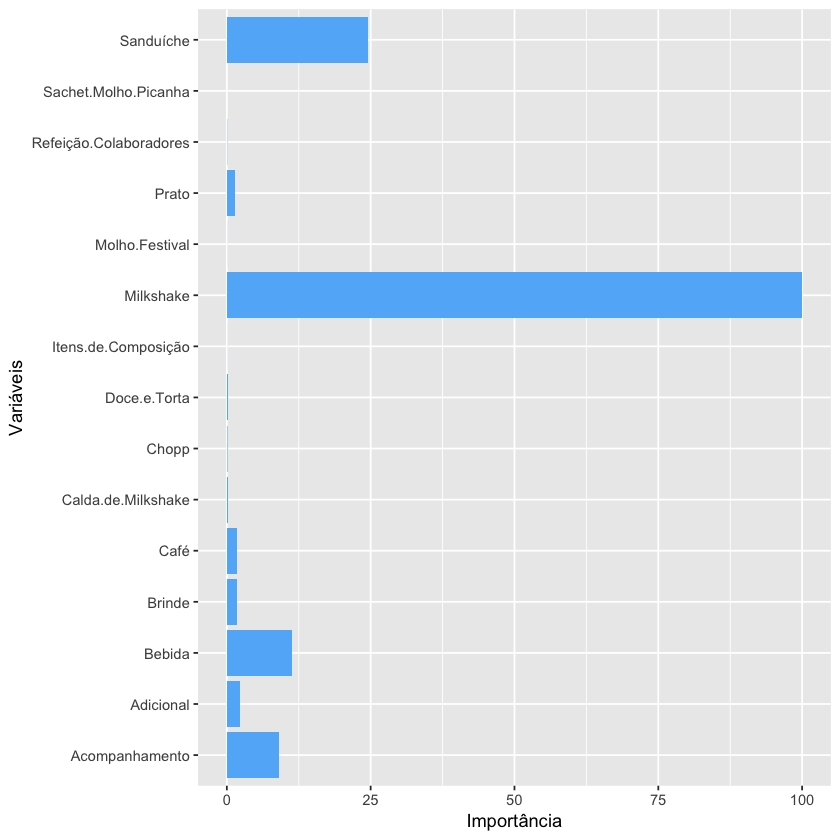

In [161]:
library(ggplot2)

#pdf("analiseVariaveisImportantesSP.pdf")

p<-ggplot(data=df.importantes, aes(x=labels, y=values)) +
  geom_bar(stat="identity", fill = "#61b5f8") + labs(x = "Variáveis" , y = "Importância")  + coord_flip() 
p 




# p<-ggplot(data=df.importantes[1:7,], aes(x=labels, y=values)) +
#   geom_bar(stat="identity", fill = "#61b5f8") + labs(x = "Variáveis" , y = "Importância") 
# p  

# Basic barplot
# p<-ggplot(data=df.importantes[8:13,], aes(x=labels, y=values)) +
#   geom_bar(stat="identity", fill = "#61b5f8") + labs(x = "Variáveis" , y = "Importância") 
# p  

#dev.off()

In [13]:
colnames(dados.vendas)

[1] "Venda"                  "Lanche.Franqueado"      "Acompanhamento"        
 [4] "Sachet.Molho.Picanha"   "Sanduíche"              "Café"                  
 [7] "Molho.Festival"         "Prato"                  "Calda.de.Milkshake"    
[10] "Doce.e.Torta"           "Linha.Original"         "Molho"                 
[13] "Refeição.Colaboradores" "Milkshake"              "Brinde"                
[16] "Adicional"              "Chopp"                  "Bebida"                
[19] "Itens.de.Composição"    "Outros"

In [14]:
length(colnames(dados.vendas))

[1] 20

In [15]:
library(grid)

In [32]:
dados.vendas <- read.csv("data/food-sp.csv", header=TRUE)
dados.vendas = as.data.frame(dados.vendas)
dados.vendas[is.na(dados.vendas)] <- 0
dados.vendas$PROJETO.CAFÉ[dados.vendas$PROJETO.CAFÉ == 0] <- mean(dados.vendas$PROJETO.CAFÉ)
dados.vendas$BRINDE[dados.vendas$BRINDE == 0] <- mean(dados.vendas$BRINDE)
dados.vendas = dados.vendas[, c(
                                'GELADO.E.MILK.SHAKE', 
                                'SANDUICHE', 
                                'BEBIDA', 
                                'ACOMPANHAMENTO',
                                'ADICIONAL', 
                                'PROJETO.CAFÉ',
                                'BRINDE',
                                'PRATO'
                               )] 


In [33]:
colnames(dados.vendas)[colnames(dados.vendas) == 'VENDA'] <- 'Venda'
colnames(dados.vendas)[colnames(dados.vendas) == 'LANCHE.FRANQUEADO'] <- 'Lanche.Franqueado'
colnames(dados.vendas)[colnames(dados.vendas) == 'ACOMPANHAMENTO'] <- 'Acompanhamento'
colnames(dados.vendas)[colnames(dados.vendas) == 'SACHET.MOLHO.PINCANHA'] <- 'Sachet.Molho.Picanha'
colnames(dados.vendas)[colnames(dados.vendas) == 'SANDUICHE'] <- 'Sanduíche'
colnames(dados.vendas)[colnames(dados.vendas) == 'PROJETO.CAFÉ'] <- 'Café'
colnames(dados.vendas)[colnames(dados.vendas) == 'MOLHO.FESTIVAL'] <- 'Molho.Festival'
colnames(dados.vendas)[colnames(dados.vendas) == 'PRATO'] <- 'Prato'
colnames(dados.vendas)[colnames(dados.vendas) == 'CALDA.BOBS.TOP'] <- 'Calda.de.Milkshake'
colnames(dados.vendas)[colnames(dados.vendas) == 'DOCE.E.TORTA'] <- 'Doce.e.Torta'
colnames(dados.vendas)[colnames(dados.vendas) == 'MOLHO'] <- 'Molho'
colnames(dados.vendas)[colnames(dados.vendas) == 'REFEICAO.COLABORADORES'] <- 'Refeição.Colaboradores'
colnames(dados.vendas)[colnames(dados.vendas) == 'GELADO.E.MILK.SHAKE'] <- 'Milkshake'
colnames(dados.vendas)[colnames(dados.vendas) == 'BRINDE'] <- 'Brinde'
colnames(dados.vendas)[colnames(dados.vendas) == 'ADICIONAL'] <- 'Adicional'
colnames(dados.vendas)[colnames(dados.vendas) == 'BEBIDA'] <- 'Bebida'
colnames(dados.vendas)[colnames(dados.vendas) == 'PROJETO.CHOPP'] <- 'Chopp'
colnames(dados.vendas)[colnames(dados.vendas) == 'ITENS.DE.COMPOSIÇÃO'] <- 'Itens.de.Composição'
colnames(dados.vendas)[colnames(dados.vendas) == 'OUTROS'] <- 'Outros'
colnames(dados.vendas)[colnames(dados.vendas) == 'LINHA.ORIGINAL'] <- 'Linha.Original'

In [18]:
# normalized <- function(data){
#     return (apply(data, FUN = function(x) (x-min(x))/(max(x)-min(x))))
# }

In [19]:
# dados.vendas$GELADO.E.MILK.SHAKE <- scale(dados.vendas$GELADO.E.MILK.SHAKE)
# dados.vendas$SANDUICHE <- scale(dados.vendas$SANDUICHE)
# dados.vendas$BEBIDA <- scale(dados.vendas$BEBIDA)
# dados.vendas$ADICIONAL <- scale(dados.vendas$ADICIONAL)
# dados.vendas$PROJETO.CAFÉ <- scale(dados.vendas$PROJETO.CAFÉ)
# dados.vendas$BRINDE <- scale(dados.vendas$BRINDE)
# dados.vendas$PRATO <- scale(dados.vendas$PRATO)

In [34]:
#dados.vendas <- log(dados.vendas)
dfs <- stack(dados.vendas)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


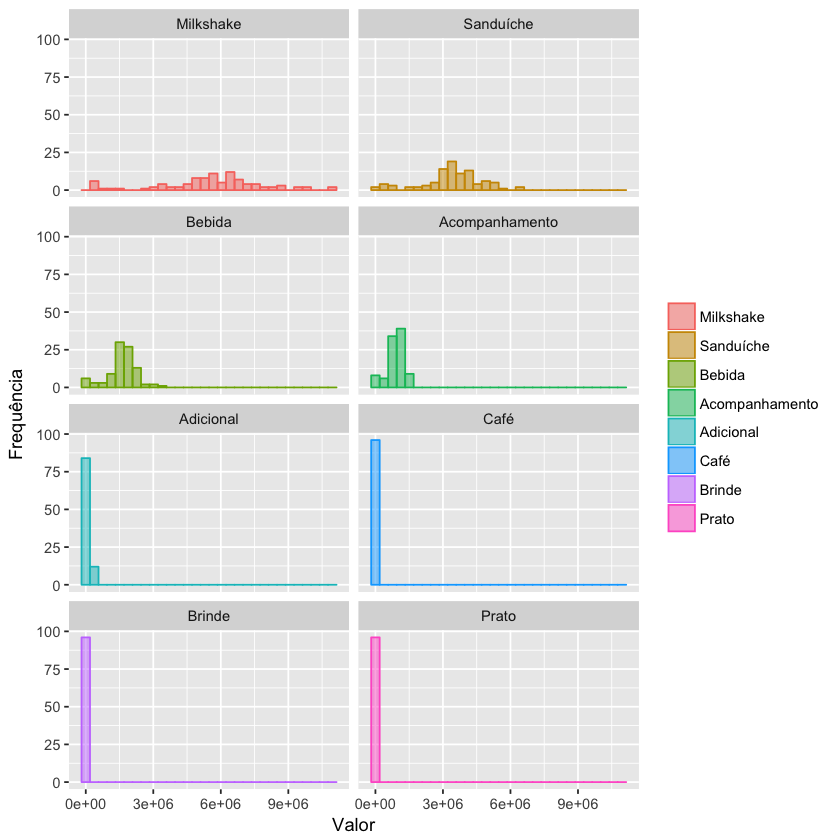

In [37]:
#pdf("histogram_normalize_variable.pdf")
#pdf("histogram_variable.pdf")

ggplot(dfs, aes(x=values)) + 
geom_histogram(aes(group=ind, colour=ind, fill=ind), alpha=0.5) + 
facet_wrap( ~ ind, ncol=2) + 
#labs(x = "Valor normalizado (transformação logarítmica)", y = "Frequência") + 
labs(x = "Valor", y = "Frequência") + 
theme(legend.title = element_blank())

#dev.off()

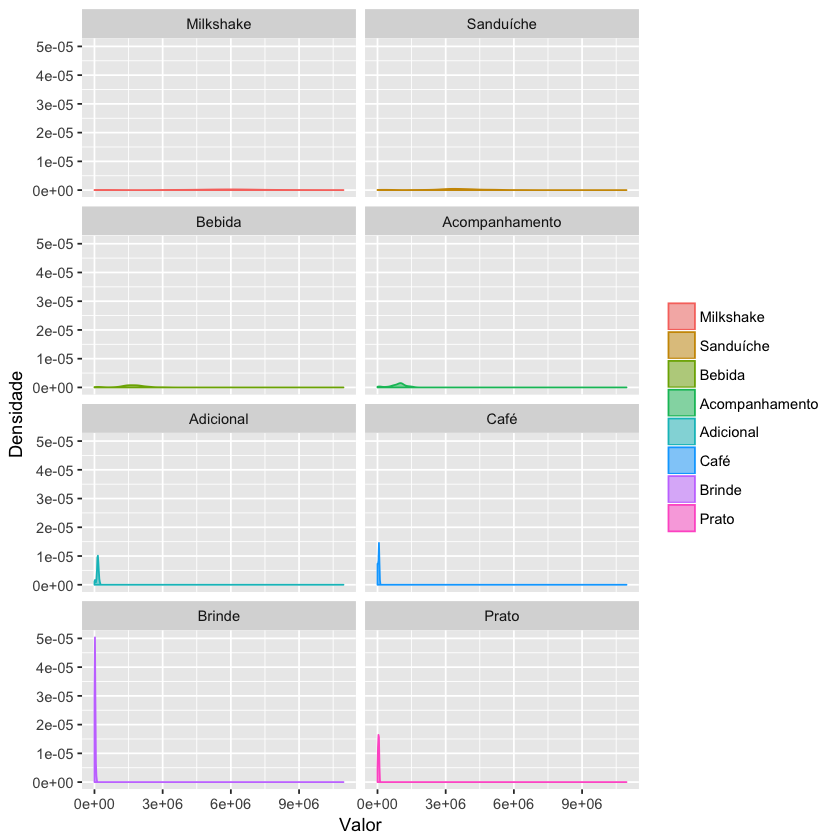

In [38]:
#pdf("density_normalize_variable.pdf")
#pdf("density_variable.pdf")

ggplot(dfs, aes(x=values)) + 
geom_density(aes(group=ind, colour=ind, fill=ind), alpha=0.5) + 
facet_wrap( ~ ind, ncol=2) + 
#labs(x = "Valor normalizado (transformação logarítmica)", y = "Densidade") + 
labs(x = "Valor", y = "Densidade") + 
theme(legend.title = element_blank())

#dev.off()

In [ ]:
dados.vendas